In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm





In [22]:
data = pd.read_csv('tips (data for regression problem).csv')


print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
data.head()


Missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


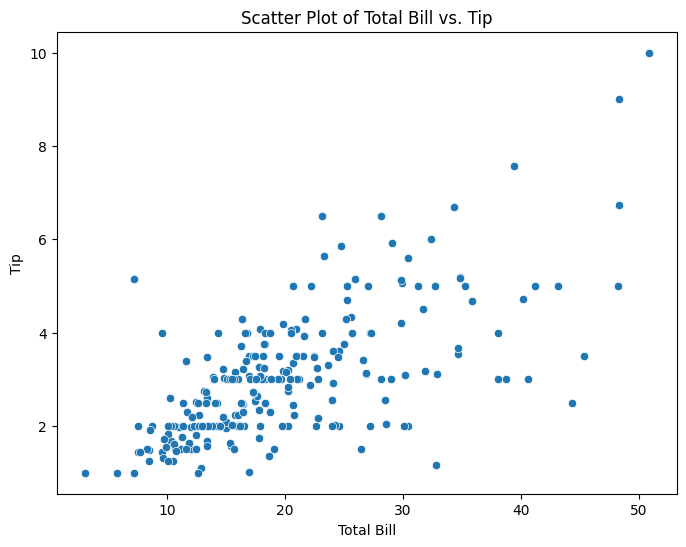

In [24]:
# Scatter plot of total_bill vs. tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


In [25]:
# Define features (X) and target variable (y)
X = data.drop('tip', axis=1)
y = data['tip']

In [26]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Linear Regression - Mean Absolute Error (MAE): {mae}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse}")
print(f"Linear Regression - R^2 Score: {r2}")

# Optional: Display coefficients for each feature to interpret the model
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Linear Regression - Mean Absolute Error (MAE): 0.6671331480264893
Linear Regression - Root Mean Squared Error (RMSE): 0.8386635807900631
Linear Regression - R^2 Score: 0.43730181943482493
            Coefficient
total_bill     0.094700
size           0.233484
sex_Male       0.028819
smoker_Yes    -0.192353
day_Sat       -0.185785
day_Sun       -0.050793
day_Thur      -0.179721
time_Lunch     0.094957


In [28]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Print metrics
print("Ridge Regression - R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Lasso Regression - R^2 Score:", r2_score(y_test, y_pred_lasso))


Ridge Regression - R^2 Score: 0.4393889716178483
Lasso Regression - R^2 Score: 0.5273068720881755


In [29]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Regression - R^2 Score:", r2_score(y_test, y_pred_tree))


Decision Tree Regression - R^2 Score: -0.004178121600921791


In [30]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print("Random Forest Regression - R^2 Score:", r2_score(y_test, y_pred_forest))


Random Forest Regression - R^2 Score: 0.2642455218065466


In [31]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("Support Vector Regression - R^2 Score:", r2_score(y_test, y_pred_svr))


Support Vector Regression - R^2 Score: 0.032004924105307975


In [32]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Regression - R^2 Score:", r2_score(y_test, y_pred_knn))


KNN Regression - R^2 Score: 0.29888587066985495


In [37]:
tips_data = pd.read_csv('tips (data for regression problem).csv')

tips_data_encoded = pd.get_dummies(tips_data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = tips_data_encoded.drop(columns='tip')  
y = tips_data_encoded['tip']  



In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

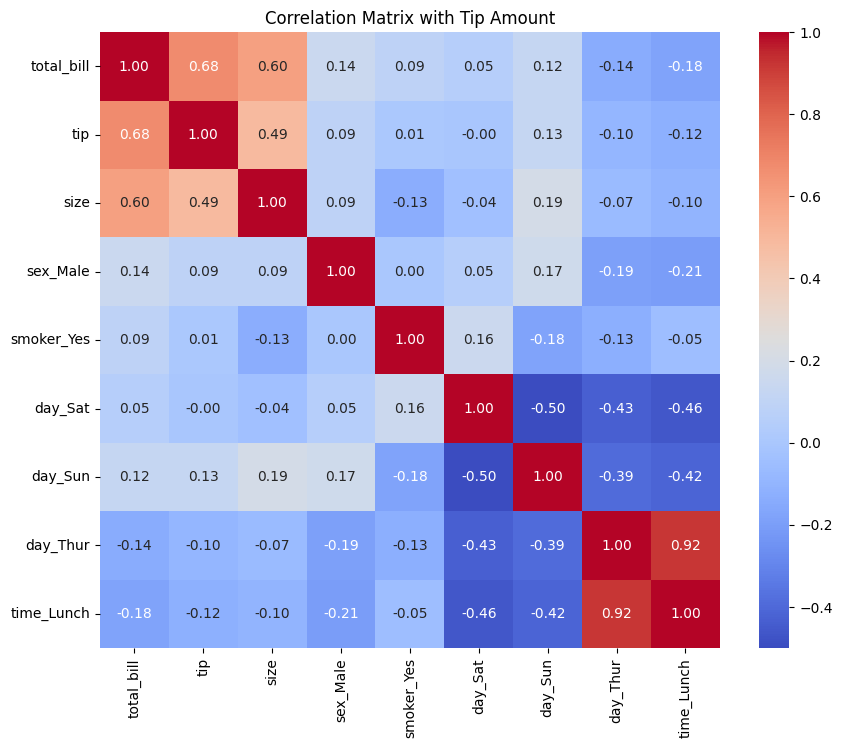

In [39]:
correlation_matrix = tips_data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix with Tip Amount")
plt.show()

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [41]:
feature_importance_linreg = pd.DataFrame({'Feature': X.columns, 'Importance': lin_reg.coef_})
feature_importance_linreg = feature_importance_linreg.sort_values(by='Importance', ascending=False)
print("Linear Regression Feature Importances:")
print(feature_importance_linreg)

Linear Regression Feature Importances:
      Feature  Importance
1        size    0.233484
7  time_Lunch    0.094957
0  total_bill    0.094700
2    sex_Male    0.028819
5     day_Sun   -0.050793
6    day_Thur   -0.179721
4     day_Sat   -0.185785
3  smoker_Yes   -0.192353


In [42]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [43]:
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_reg.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importances:")
print(feature_importance_rf)


Random Forest Feature Importances:
      Feature  Importance
0  total_bill    0.767043
3  smoker_Yes    0.069417
1        size    0.058045
4     day_Sat    0.030292
5     day_Sun    0.025223
2    sex_Male    0.025187
7  time_Lunch    0.012975
6    day_Thur    0.011818


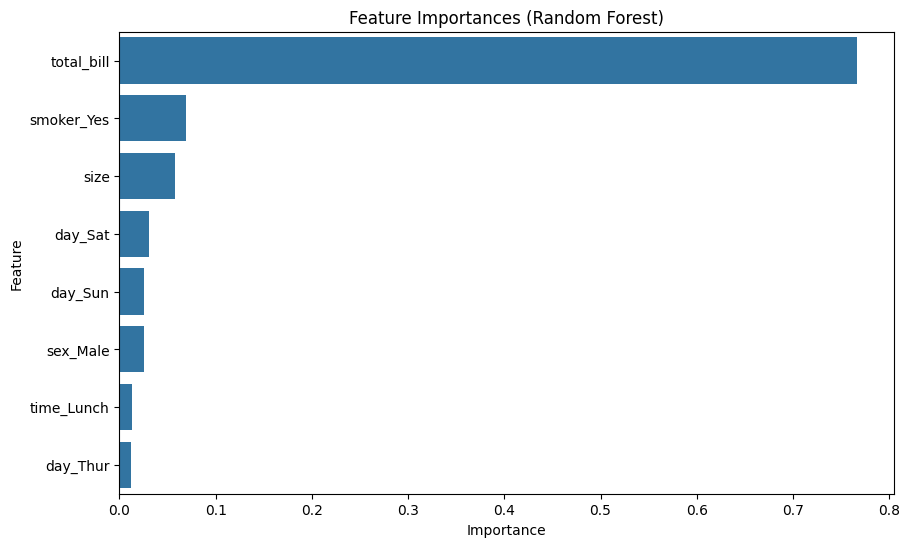

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [46]:

print("\n--- Actionable Insights for Management ---\n")


--- Actionable Insights for Management ---



In [47]:
#Total Bill
if 'total_bill' in feature_importance_rf['Feature'].values:
    print("1. **Total Bill**: There is a strong correlation between 'total_bill' and 'tip' amounts.")
    print("   - Encourage upselling strategies to increase the total bill per table.")
    print("   - This could involve promoting add-ons, premium items, or special offers.\n")


1. **Total Bill**: There is a strong correlation between 'total_bill' and 'tip' amounts.
   - Encourage upselling strategies to increase the total bill per table.
   - This could involve promoting add-ons, premium items, or special offers.



In [48]:
# Insight 2: Table Size
if 'size' in feature_importance_rf['Feature'].values:
    print("2. **Table Size**: Larger tables tend to leave higher tips overall.")
    print("   - Consider assigning more experienced staff to larger parties to enhance service quality.")
    print("   - Offer incentives for groups or packages aimed at larger parties.\n")

# Insight 3: Day and Time
if any(day in feature_importance_rf['Feature'].values for day in ['day_Fri', 'day_Sat', 'day_Sun']):
    print("3. **Day of the Week**: Tips may vary by day, with weekends potentially showing higher amounts.")
    print("   - Focus on optimizing staffing during peak weekend hours.")
    print("   - Offer promotions or events on slower days to balance customer flow.\n")

if 'time_Lunch' in feature_importance_rf['Feature'].values:
    print("4. **Meal Time (Lunch vs Dinner)**: 'Dinner' generally has higher bills and tips.")
    print("   - For lunch hours, offer quicker service and lighter options to cater to shorter breaks.")
    print("   - Enhance dinner experiences with themed events or dining experiences to encourage higher spending.\n")

# Insight 4: Smoker vs Non-Smoker
if 'smoker_Yes' in feature_importance_rf['Feature'].values:
    print("5. **Smoker vs Non-Smoker**: Smoking preferences can influence tips slightly.")
    print("   - Tailor dining spaces and ensure that smoker/non-smoker preferences are well accommodated.")
    print("   - Promote specific sections or dining experiences that cater to smoker preferences to enhance satisfaction.\n")

2. **Table Size**: Larger tables tend to leave higher tips overall.
   - Consider assigning more experienced staff to larger parties to enhance service quality.
   - Offer incentives for groups or packages aimed at larger parties.

3. **Day of the Week**: Tips may vary by day, with weekends potentially showing higher amounts.
   - Focus on optimizing staffing during peak weekend hours.
   - Offer promotions or events on slower days to balance customer flow.

4. **Meal Time (Lunch vs Dinner)**: 'Dinner' generally has higher bills and tips.
   - For lunch hours, offer quicker service and lighter options to cater to shorter breaks.
   - Enhance dinner experiences with themed events or dining experiences to encourage higher spending.

5. **Smoker vs Non-Smoker**: Smoking preferences can influence tips slightly.
   - Tailor dining spaces and ensure that smoker/non-smoker preferences are well accommodated.
   - Promote specific sections or dining experiences that cater to smoker preferences 

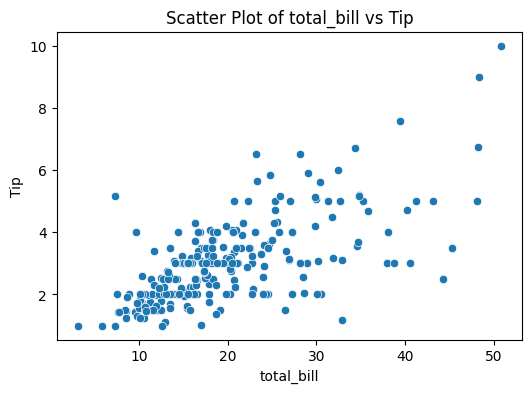

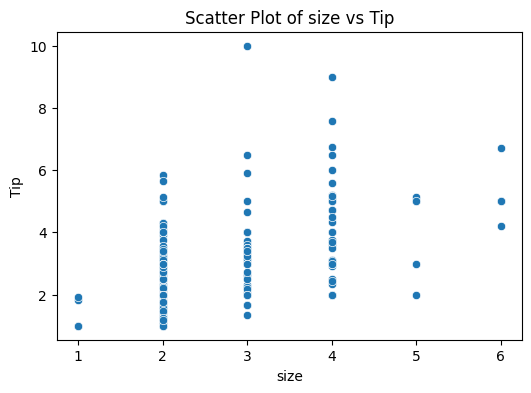

In [50]:
#  Scatter Plot for Individual Features
for feature in ['total_bill', 'size']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=tips_data_encoded[feature], y=y)
    plt.title(f"Scatter Plot of {feature} vs Tip")
    plt.xlabel(feature)
    plt.ylabel("Tip")
    plt.show()

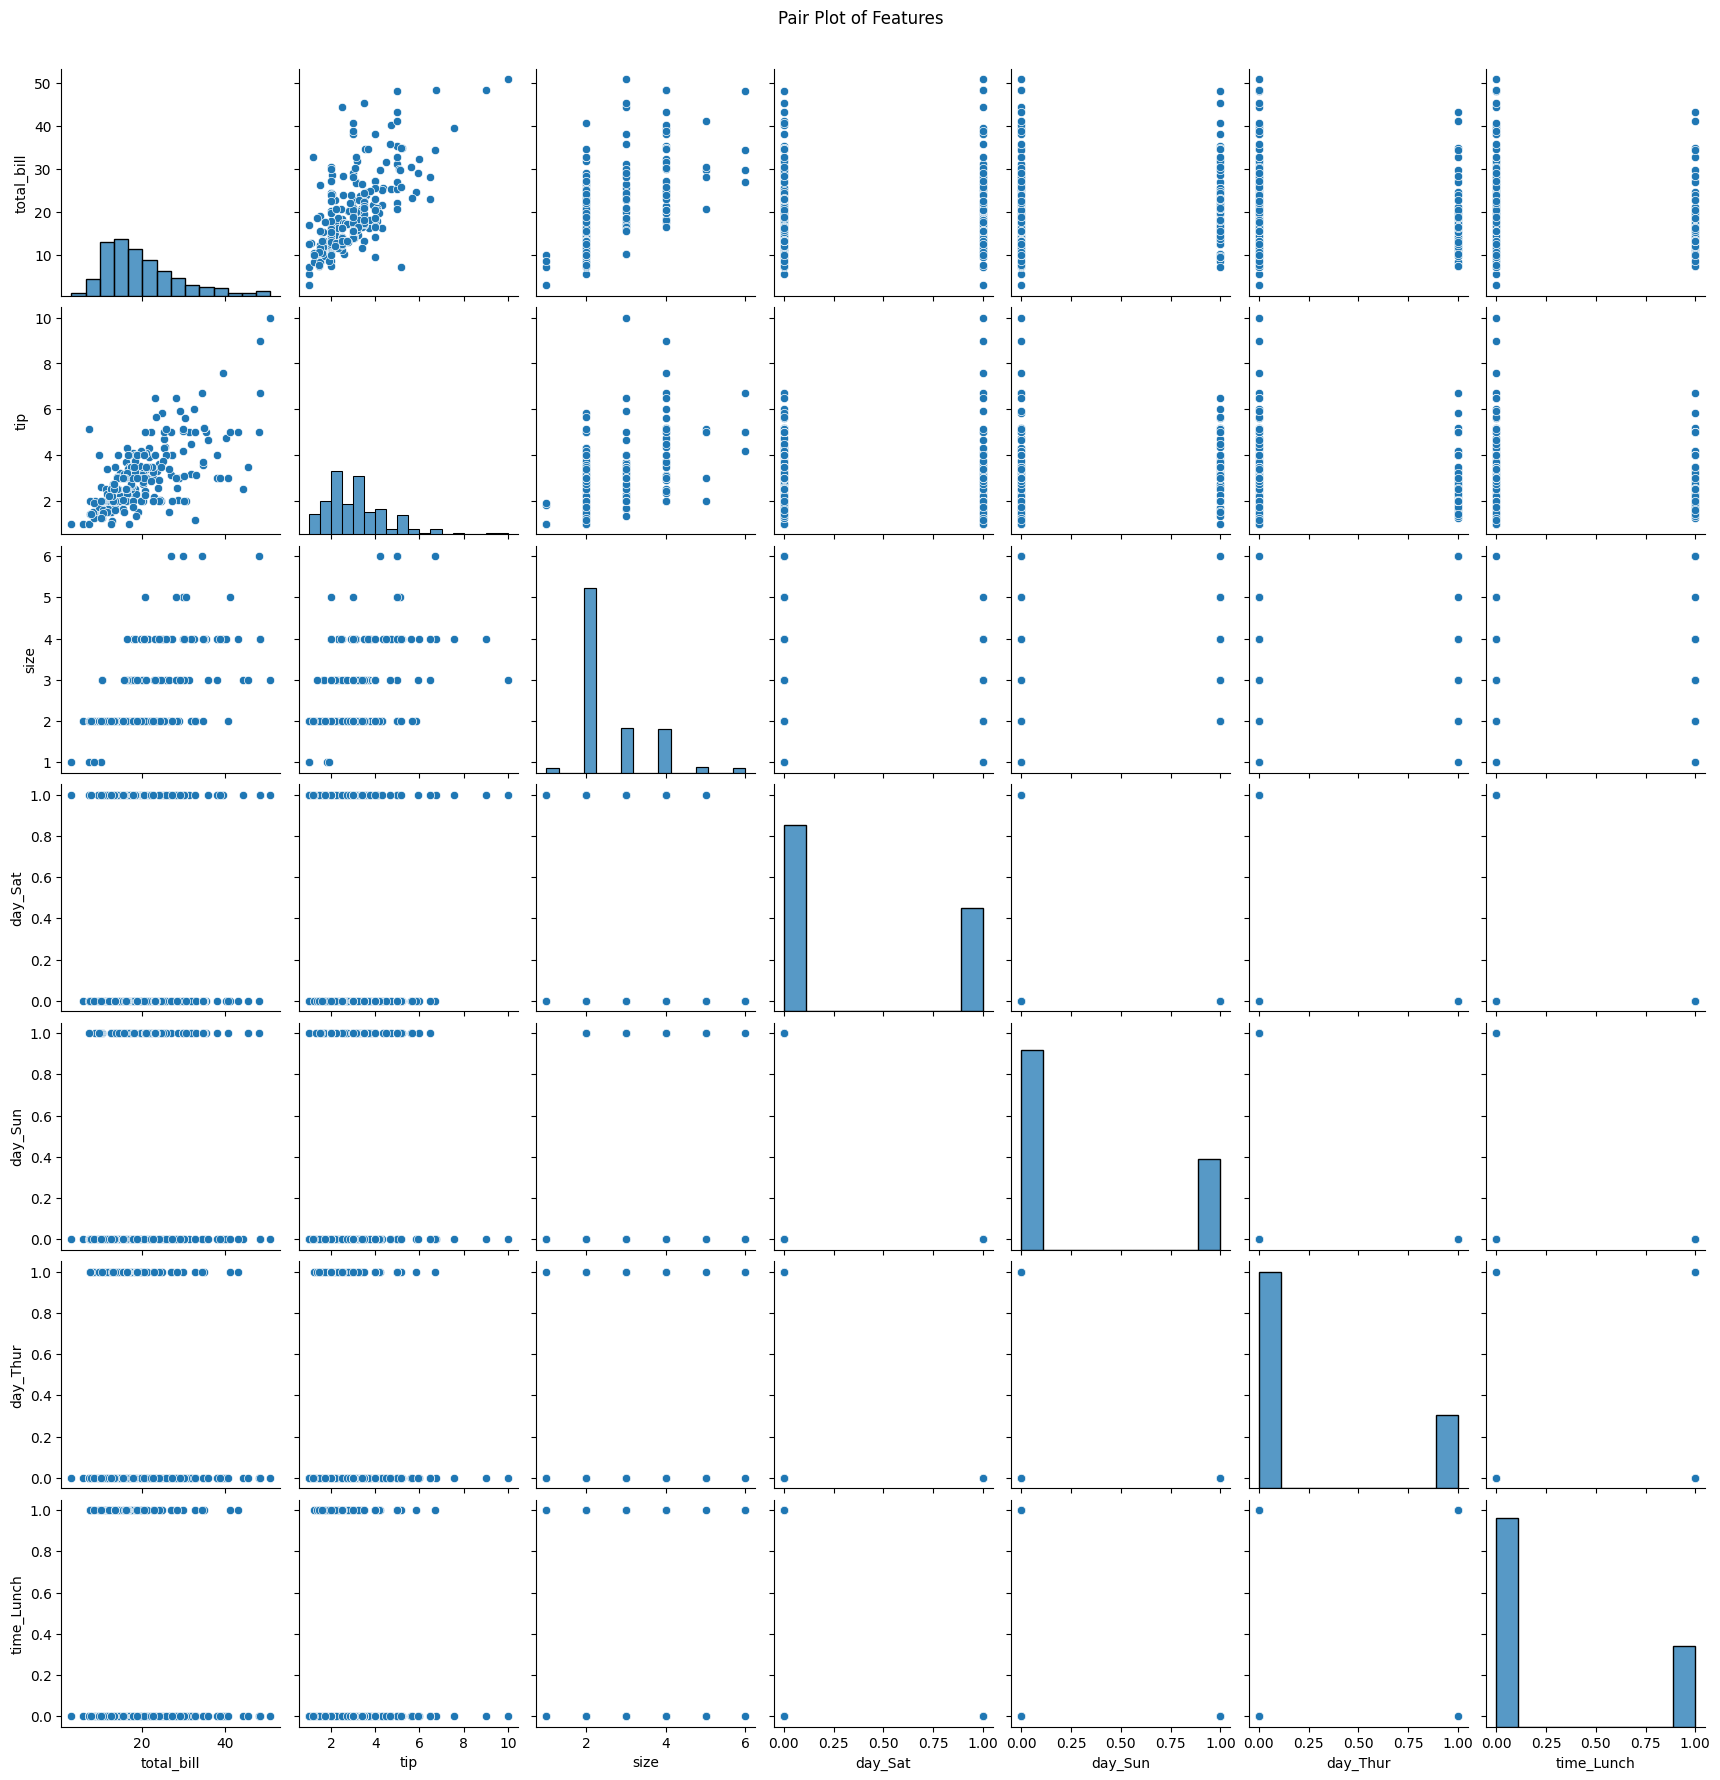

In [51]:
#  Pair Plot for Multiple Features
sns.pairplot(tips_data_encoded[['total_bill', 'tip', 'size'] + 
                               [col for col in tips_data_encoded.columns if col.startswith('day') or col.startswith('time')]])
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

In [66]:
import statsmodels.api as sm
from math import sqrt
X = data[['total_bill', 'size']]  
y = data['tip']

In [67]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [68]:
from statsmodels.stats.diagnostic import linear_rainbow
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_stat)
print("p-value:", rainbow_p_value)

Rainbow Test Statistic: 1.1902656646832819
p-value: 0.17048935693447306


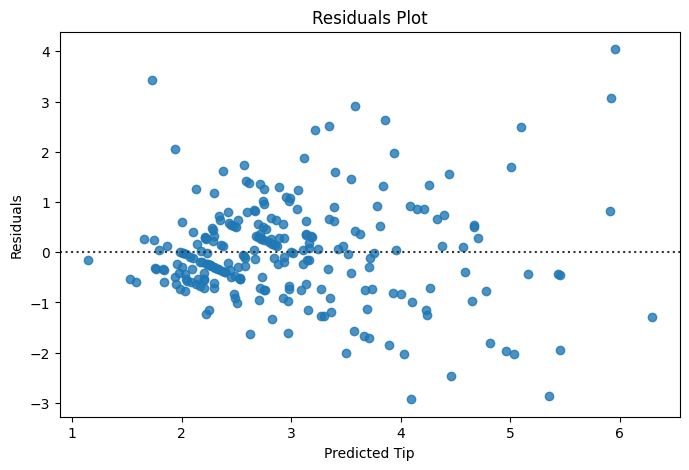

In [76]:
# Residuals Plot without lowess smoothing
plt.figure(figsize=(8, 5))
sns.residplot(x=predictions, y=residuals, line_kws={'color': 'red'})  # Removed lowess=True
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


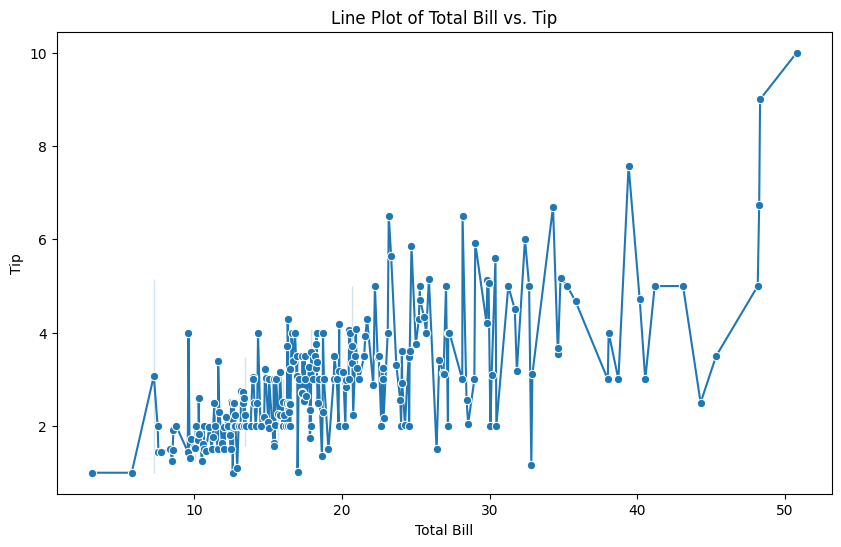

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['total_bill'], y=data['tip'], marker="o")
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Line Plot of Total Bill vs. Tip')
plt.show()

In [78]:



X = data[['total_bill', 'size']]  
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)

linear_model = sm.OLS(y_train, X_train_lm).fit()
y_pred_linear = linear_model.predict(X_test_lm)

rmse_linear = sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


poly_model = sm.OLS(y_train, X_train_poly).fit()
y_pred_poly = poly_model.predict(X_test_poly)


rmse_poly = sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)


print("Linear Regression RMSE:", rmse_linear)
print("Linear Regression R-squared:", r2_linear)
print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R-squared:", r2_poly)

# Select the best model based on lower RMSE and higher R-squared
if rmse_poly < rmse_linear:
    print("Polynomial Regression is the better model.")
else:
    print("Linear Regression is the better model.")


Linear Regression RMSE: 0.8053568271607007
Linear Regression R-squared: 0.48110840979894987
Polynomial Regression RMSE: 0.8717230930732801
Polynomial Regression R-squared: 0.392065143036219
Linear Regression is the better model.
